# Exploratory Data Analysis

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df_2000 = pd.read_csv("Data/final_tmdb_data_2000.csv.gz", low_memory = False)

In [5]:
df_2001 = pd.read_csv("Data/final_tmdb_data_2001.csv.gz", low_memory = False)

In [6]:
EDA_df = pd.concat([df_2000, df_2001])
EDA_df.head()

,imdb_id,adult,backdrop_path,belongs_to_collection,budget,genres,homepage,id,original_language,original_title,...,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count,certification
0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,tt0113026,0.0,/vMFs7nw6P0bIV1jDsQpxAieAVnH.jpg,NaN,10000000.0,"[{'id': 35, 'name': 'Comedy'}, {'id': 10402, '...",NaN,62127.0,en,The Fantasticks,...,0.0,86.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Try to remember the first time magic happened,The Fantasticks,0.0,5.500,22.0,NaN
2,tt0113092,0.0,NaN,NaN,0.0,"[{'id': 878, 'name': 'Science Fiction'}]",NaN,110977.0,en,For the Cause,...,0.0,100.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,The ultimate showdown on a forbidden planet.,For the Cause,0.0,5.100,8.0,NaN
3,tt0116391,0.0,NaN,NaN,0.0,"[{'id': 18, 'name': 'Drama'}, {'id': 28, 'name...",NaN,442869.0,hi,Gang,...,0.0,152.0,"[{'english_name': 'Hindi', 'iso_639_1': 'hi', ...",Released,NaN,Gang,0.0,4.000,1.0,NaN
4,tt0118694,0.0,/n4GJFGzsc7NinI1VeGDXIcQjtU2.jpg,NaN,150000.0,"[{'id': 18, 'name': 'Drama'}, {'id': 10749, 'n...",NaN,843.0,cn,花樣年華,...,12854953.0,99.0,"[{'english_name': 'Cantonese', 'iso_639_1': 'c...",Released,"Feel the heat, keep the feeling burning, let t...",In the Mood for Love,0.0,8.113,2101.0,PG


In [5]:
# EDA_df.to_csv("Data/tmdb_results_combined.csv.gz",compression='gzip',index=False)

1. How many movies had at least some valid financial information (values > 0 for budget OR revenue)?

In [10]:
budgets = (EDA_df['budget'] > 0)
budgets.value_counts()

False    1977
True      540
Name: budget, dtype: int64

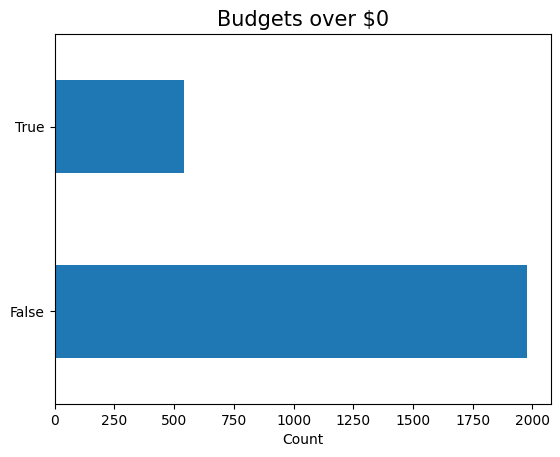

In [27]:
budgets = (EDA_df['budget'] > 0).value_counts()

#Plot the counts of each cereal brand

budgets.plot(kind = 'barh')
plt.title('Budgets over $0', fontsize = 15)
plt.ylabel('', fontsize = 10)
plt.xlabel('Count', fontsize = 10)

#Show your figure
plt.show()

In [8]:
revenues = (EDA_df['revenue'] > 0)
revenues.value_counts()

True     352
False    188
Name: revenue, dtype: int64

- Answer: 540 movies had budget information listed and 352 movies had revenue information listed.

2. How many movies are there in each of the certification categories (G/PG/PG-13/R)?

In [33]:
EDA_df['certification'].value_counts()

R          456
PG-13      183
NR          68
PG          63
G           24
NC-17        6
Unrated      1
-            1
Name: certification, dtype: int64

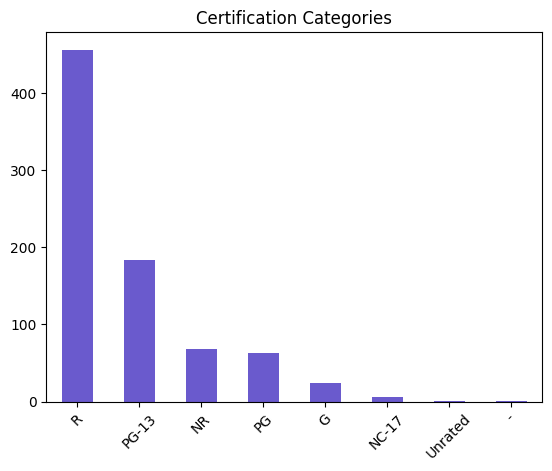

In [34]:
#Distribution of Cereal types
certifications = EDA_df['certification'].value_counts()

#Let's give it some color
certifications.plot(kind = 'bar', color = ['slateblue'])
plt.xticks(rotation = 45)
plt.title('Certification Categories')
plt.show()

3. What is the average revenue per certification category?


In [10]:
EDA_df.groupby('certification', as_index=False)['revenue'].mean()

,certification,revenue
0,G,1.332169e+08
1,NR,1.191166e+07
2,PG,1.186276e+08
3,PG-13,1.039652e+08
4,R,3.685420e+07


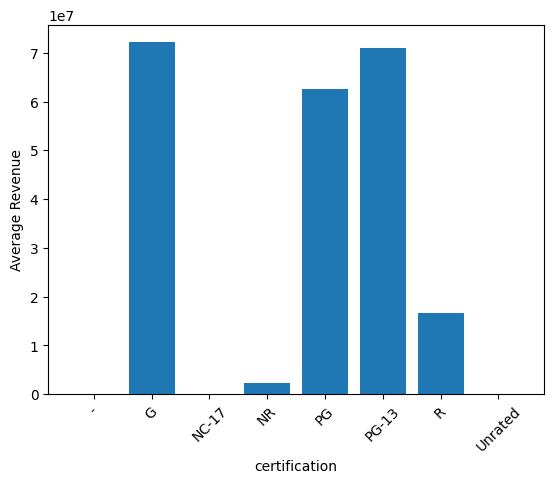

In [40]:
cert_rev = EDA_df.groupby('certification')['revenue'].mean()

plt.bar(cert_rev.index, cert_rev.values)
plt.ylabel('Average Revenue')
plt.xlabel('certification')
plt.xticks(rotation=45);


4. What is the average budget per certification category?

In [11]:
EDA_df.groupby('certification', as_index=False)['budget'].mean()

,certification,budget
0,G,4.400000e+07
1,NR,8.928341e+06
2,PG,4.768939e+07
3,PG-13,4.522526e+07
4,R,2.216669e+07


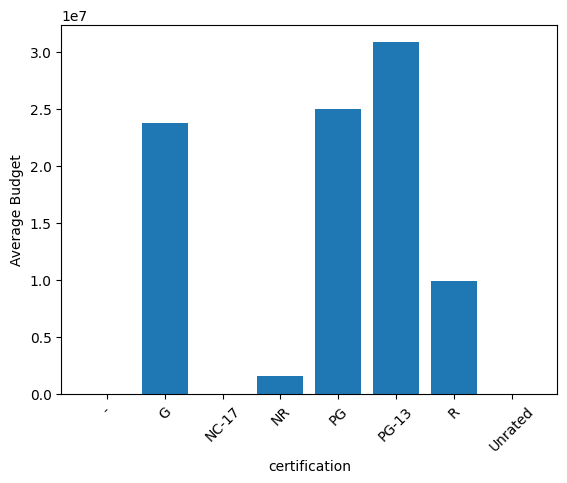

In [41]:
cert_bud = EDA_df.groupby('certification')['budget'].mean()

plt.bar(cert_bud.index, cert_bud.values)
plt.ylabel('Average Budget')
plt.xlabel('certification')
plt.xticks(rotation=45);